In [2]:
# Prediction customer churn from telco data

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from datetime import datetime

In [4]:
# Reading in data

telco = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/Churn prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', None)
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# Lets see the shape of the dataset

telco.shape

(7043, 21)

In [6]:
# Checking uniqueness at customerID level

len(telco['customerID'].unique())

7043

In [7]:
# Hence, the data is unique at customer ID level. So no need to remove duplicates

In [8]:
## Exploratory data analyis

In [9]:
# Lets start with the gender split

gend = telco.groupby(by="gender")[telco.columns[0]].count().sort_values(ascending=False)
gend

gender
Male      3555
Female    3488
Name: customerID, dtype: int64

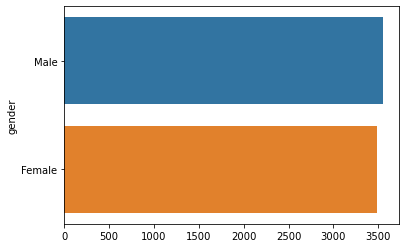

In [10]:
sb.barplot(gend.values, gend.index);

In [11]:
# Creating a histogram of tenure vs churn

max(telco['tenure'])

72

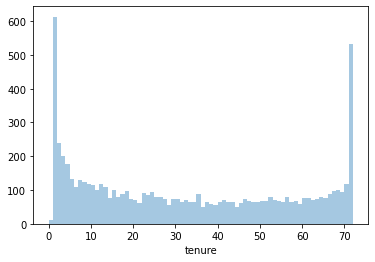

In [12]:
sb.distplot(telco['tenure'], bins = 72, kde = False);

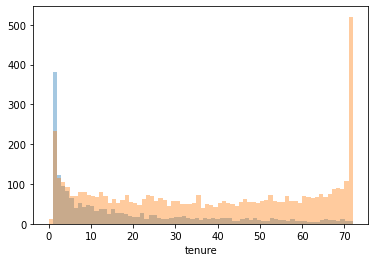

In [16]:
# Clearly there are a lot of entries with very low and very high tenure

# Splitting it based on churn

sb.distplot(telco[telco['Churn']=='Yes']['tenure'], bins = 72, kde = False)
sb.distplot(telco[telco['Churn']=='No']['tenure'], bins = 72, kde = False)

In [17]:
# Clearly tenure has an impact on churn. Low tenure customers tend to churn more as compared to high tenure customers